In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/autoprognosis/code_v4/dataset/INFLUD-16-06-2020-Revisado.csv',sep=';',encoding = "ISO-8859-1")
print(df.shape)


/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,59,61,62,63,103,105,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(291130, 134)


In [3]:
# Inputing constraint in the dataset 

# Positive case:

df1 = df[df['PCR_SARS2']==1]
print(df1.shape)


# Hospitalized people:

df1 = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]
print(df1.shape)

(97924, 134)
(90133, 134)


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
# Covid19 ocurrences for each state

df2 = df1['SG_UF_NOT'].value_counts().to_frame()
df2 = df2.reset_index()
df2 = df2.rename(columns={"SG_UF_NOT": "ocurrences"})


In [5]:
# Population for each state

df_pop = pd.read_csv('/home/pedro/Desktop/autoprognosis/code_v4/dataset/pop.csv',sep=',',encoding = "ISO-8859-1")

In [6]:
# Joining the datasets

df_joined = pd.merge(df_pop,df2,on='index')

In [7]:
print(df_joined)

   index  populacao  ocurrences
0     SP   45919049       40984
1     MG   21168791        1895
2     RJ   17264943       14521
3     BA   14873064        2210
4     PR   11433957        1776
5     RS   11377239        2056
6     PE    9557071        4370
7     CE    9132078        4842
8     PA    8602865        4582
9     SC    7164788         847
10    MA    7075181         576
11    GO    7018354         691
12    AM    4144597        3061
13    ES    4018650         801
14    PB    4018127         645
15    RN    3506853         818
16    MT    3484466         404
17    AL    3337357         762
18    PI    3273227        1256
19    DF    3015268        1567
20    MS    2778986         302
21    SE    2298696         488
22    RO    1777225         136
23    TO    1572866         271
24    AC     881935          45
25    AP     845731         103
26    RR     605761         124


<Figure size 1080x432 with 0 Axes>

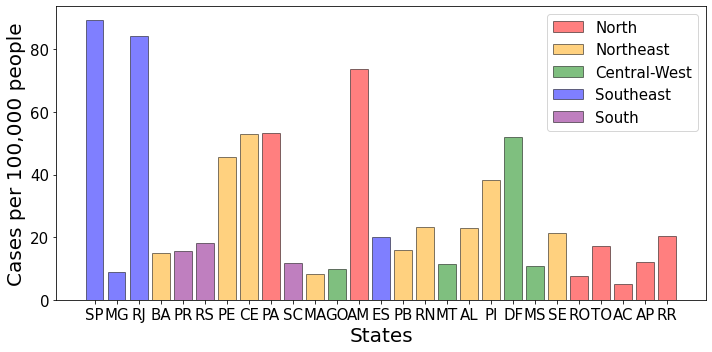

In [8]:

# Plotting the cases per 100,000 people


clrs = ['blue', 'blue',  'blue' , 'orange', 'purple', 'purple', 'orange', 'orange', 'red', 'purple', 'orange',  'green', 'red', 'blue', 'orange',  'orange', 'green', 'orange',  'orange', 'green', 'green', 'orange', 'red',  'red', 'red' ,'red', 'red']
# [     'SP',    'MG',    'RJ',     'BA',     'PR',     'RS',     'PE',    'CE',     'PA',     'SC',    'MA',    'GO',    'AM',  'ES',    'PB',      'RN',     'MT',    'AL',      'PI',    'DF',    'MS',    'SE',    'RO',    'TO',   AC  ,'AP',  'RR'

clr = ['blue','purple', 'green', 'orange', 'red']


plt.figure(figsize=(15,6))
city_count  = (df_joined['ocurrences']/df_joined['populacao'])*100000
city_count = city_count[:,]
plt.figure(figsize=(10,5))
plt.bar(city_count.index, city_count.values, alpha=0.5, color = clrs, edgecolor='k')
plt.bar([12] , [0], alpha=0.5, edgecolor='k', color = 'red',label ='North')    # AM
plt.bar([3] , [0], alpha=0.5, edgecolor='k', color = 'orange',label ='Northeast')     # BA
plt.bar([16], [0], alpha=0.5, edgecolor='k', color = 'green',label ='Central-West')     # MT
plt.bar([0] , [0], alpha=0.5, edgecolor='k', color = 'blue' ,label = 'Southeast')  # SP
plt.bar([5] , [0], alpha=0.5, edgecolor='k', color = 'purple',label ='South')       # RS
#plt.title('Hopitalized Patients with COVID-19 for Brazilian States', fontsize=20)
plt.ylabel('Cases per 100,000 people', fontsize=20)
plt.xlabel('States', fontsize=20)
#plt.yscale('log')
x=np.arange(27)
plt.xticks(x,['SP','MG','RJ','BA','PR','RS','PE','CE','PA','SC','MA','GO','AM','ES','PB','RN','MT','AL','PI',\
             'DF','MS','SE','RO','TO','AC','AP','RR'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('distribution_covid_people_proportion_16_june.pdf')

<class 'pandas.core.series.Series'>


<Figure size 1080x432 with 0 Axes>

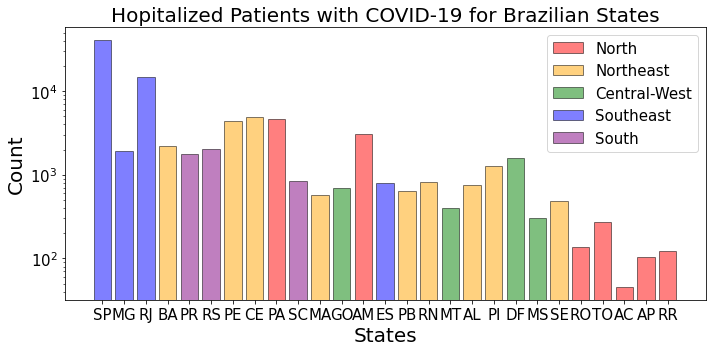

In [9]:
# Plottin the cases for each state


clrs = ['blue', 'blue',  'blue' , 'orange', 'purple', 'purple', 'orange', 'orange', 'red', 'purple', 'orange',  'green', 'red', 'blue', 'orange',  'orange', 'green', 'orange',  'orange', 'green', 'green', 'orange', 'red',  'red', 'red' ,'red', 'red']
# [     'SP',    'MG',    'RJ',     'BA',     'PR',     'RS',     'PE',    'CE',     'PA',     'SC',    'MA',    'GO',    'AM',  'ES',    'PB',      'RN',     'MT',    'AL',      'PI',    'DF',    'MS',    'SE',    'RO',    'TO',  'AC'     ,  'AP',  'RR'

clr = ['blue','purple', 'green', 'orange', 'red']

number = [0, 5, 16, 3, 12]
label = ['oi','oi','oi','oi','oi']

plt.figure(figsize=(15,6))
city_count  = df_joined['ocurrences']
city_count = city_count[:,]
plt.figure(figsize=(10,5))
plt.bar(city_count.index, city_count.values, alpha=0.5, color = clrs, edgecolor='k')
plt.bar([12] , [0], alpha=0.5, edgecolor='k', color = 'red',label ='North')    # AM
plt.bar([3] , [0], alpha=0.5, edgecolor='k', color = 'orange',label ='Northeast')     # BA
plt.bar([16], [0], alpha=0.5, edgecolor='k', color = 'green',label ='Central-West')     # MT
plt.bar([0] , [0], alpha=0.5, edgecolor='k', color = 'blue' ,label = 'Southeast')  # SP
plt.bar([5] , [0], alpha=0.5, edgecolor='k', color = 'purple',label ='South')       # RS




plt.title('Hopitalized Patients with COVID-19 for Brazilian States', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.yscale('log')
x=np.arange(27)
plt.xticks(x,['SP','MG','RJ','BA','PR','RS','PE','CE','PA','SC','MA','GO','AM','ES','PB','RN','MT','AL','PI',\
             'DF','MS','SE','RO','TO','AC','AP','RR'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.legend(fontsize=15)
plt.savefig('distribution_covid_people_16_june.pdf')

print(type(city_count))